In [1]:
import os
spark_version = 'spark-3.5.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done


In [2]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Energy_Cancer").getOrCreate()

In [3]:


# Read in data
from pyspark import SparkFiles

import requests
url = "https://raw.githubusercontent.com/fraserclaire/Group3_Project4/main/Artien/Machine%20Learning%20Dataset-Cancer%26Energy.csv"
response = requests.get(url)
# with open("Machine Learning Dataset-Cancer&Energy.csv", "wb") as f:
#     f.write(response.content)

spark.sparkContext.addFile(url)
cancer_energy = spark.read.csv(SparkFiles.get('Machine Learning Dataset-Cancer&Energy.csv'),inferSchema=True,header=True)

# Show DataFrame
cancer_energy.show()

+---+------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------------------+-----------------+---------------------------+---------------+-----------------+---------------------------+-------

In [4]:
#Imports for machine learning
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [5]:
cancer_energy_df = cancer_energy.toPandas()

In [6]:
cancer_energy_df.head()

,_c0,State Abbreviation,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),...,2019_Population,2020_LungBronchus,2020_LungBronchus_perCapita,2020_Population,2021 Lung & Bronchus,2021_Population,2021_LungBronchus_perCapita,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG,Lung/Bronchus_Classifer
0,0,AK,15481,15521,14819,18225,19511,16613,16376,17325,...,731545,400,0.000546,732964.0,370,734923,0.000503,0.004628,0.000591,0
1,1,AL,651032,547004,565051,575912,494311,410168,378890,377152,...,4903185,4230,0.000841,5031864.0,4520,5050380,0.000895,0.005554,0.000867,1
2,2,AR,306119,296732,327099,339214,226889,246437,267591,304145,...,3017804,2760,0.000916,3014348.0,2970,3028443,0.000981,0.005473,0.000898,1
3,3,AZ,459909,420570,454865,447849,385822,323878,334512,331492,...,7278717,4200,0.000584,7186683.0,4550,7272487,0.000626,0.004939,0.000595,1
4,4,CA,55264,43832,38151,39486,30967,32077,33663,33256,...,39512223,18040,0.000457,39503200.0,17760,39145060,0.000454,0.004456,0.000473,0


In [7]:
# prompt: drop the _c0 column, state, 2021 lung cancer/capita columns from the cancer_energy_df pandas dataframe

cancer_energy_df = cancer_energy_df.drop(columns=["_c0","State Abbreviation","State","2021_LungBronchus_perCapita"])


In [8]:
cancer_energy_df.head()

,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2019_LungBronchus_perCapita,2019_Population,2020_LungBronchus,2020_LungBronchus_perCapita,2020_Population,2021 Lung & Bronchus,2021_Population,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG,Lung/Bronchus_Classifer
0,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,0.000547,731545,400,0.000546,732964.0,370,734923,0.004628,0.000591,0
1,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,0.000846,4903185,4230,0.000841,5031864.0,4520,5050380,0.005554,0.000867,1
2,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,0.000891,3017804,2760,0.000916,3014348.0,2970,3028443,0.005473,0.000898,1
3,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,0.000589,7278717,4200,0.000584,7186683.0,4550,7272487,0.004939,0.000595,1
4,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,0.000481,39512223,18040,0.000457,39503200.0,17760,39145060,0.004456,0.000473,0


In [9]:
X = cancer_energy_df.copy()
X.drop('Lung/Bronchus_Classifer',axis=1,inplace=True)
X.head()



,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2019_LungBronchus,2019_LungBronchus_perCapita,2019_Population,2020_LungBronchus,2020_LungBronchus_perCapita,2020_Population,2021 Lung & Bronchus,2021_Population,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG
0,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,400,0.000547,731545,400,0.000546,732964.0,370,734923,0.004628,0.000591
1,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,4150,0.000846,4903185,4230,0.000841,5031864.0,4520,5050380,0.005554,0.000867
2,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,2690,0.000891,3017804,2760,0.000916,3014348.0,2970,3028443,0.005473,0.000898
3,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,4290,0.000589,7278717,4200,0.000584,7186683.0,4550,7272487,0.004939,0.000595
4,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,18990,0.000481,39512223,18040,0.000457,39503200.0,17760,39145060,0.004456,0.000473


In [10]:
y = cancer_energy_df['Lung/Bronchus_Classifer']
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Lung/Bronchus_Classifer, dtype: int32

In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [13]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [14]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1250)

In [16]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [18]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [19]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1,2
Actual 1,1,9


Accuracy Score : 0.7692307692307693
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.82      0.90      0.86        10

    accuracy                           0.77        13
   macro avg       0.66      0.62      0.63        13
weighted avg       0.74      0.77      0.75        13



In [20]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.05259196849132421, '2011-2020 allsites/capita AVG'),
 (0.04171561673799352, '2018_LungBronchus_perCapita'),
 (0.03530429619431641, '2013_LungBronchus_perCapita'),
 (0.03511498190531943, '2017_LungBronchus_perCapita'),
 (0.03416119239817468, '2019_LungBronchus_perCapita'),
 (0.03299400940754548, '2020_LungBronchus_perCapita'),
 (0.03268724243307033, '2011_LungBronchus_perCapita'),
 (0.025404638086900168, '2012_LungBronchus_perCapita'),
 (0.023497736246306546, '2011-2020 lungBronchus/capita AVG'),
 (0.023440777535758118, '2016_LungBronchus_perCapita'),
 (0.02141405426940326, '2015_LungBronchus_perCapita'),
 (0.013590381499432806, '2011(S)'),
 (0.012929513166673083, '2014_LungBronchus_perCapita'),
 (0.012489678062760185, '2018(TR)'),
 (0.011334287136362895, '2020(S)'),
 (0.010891729909236338, '2020(TR)'),
 (0.010879481801931974, '2019(TR)'),
 (0.009721721776248951, '2013(S)'),
 (0.00971196149873236, '2012(S)'),
 (0.009467145768264205, '2019(S)'),
 (0.008234538386860907, '2016(TR)'),
 

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

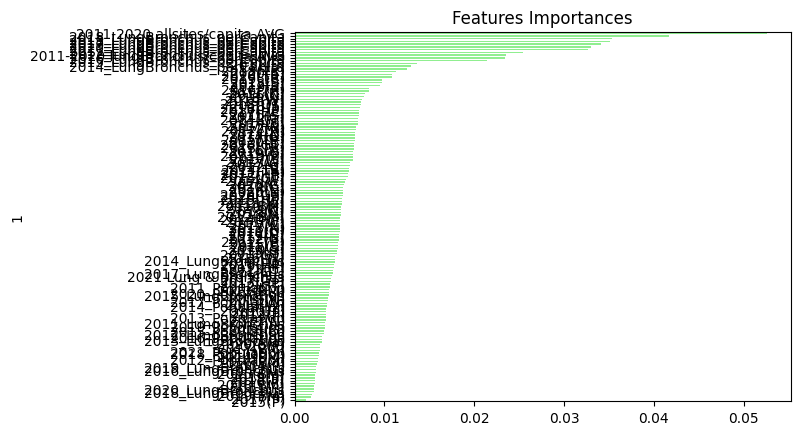

In [21]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

<Axes: title={'center': 'Top 20 Most Important Features'}, ylabel='1'>

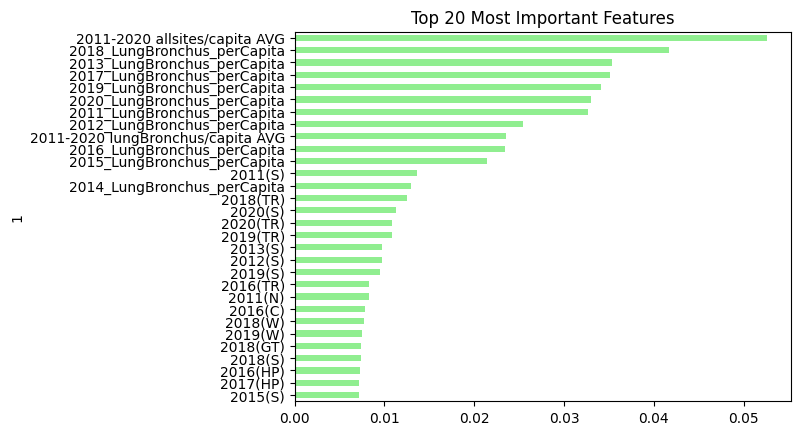

In [22]:
# Visualize the top 20 most important features
importances_top20 = importances_sorted.tail(30)  # Select the bottom 20 (top 20 in terms of importance)
importances_top20.plot(kind='barh', color='lightgreen', title='Top 20 Most Important Features', legend=False)

In [23]:
#Try dropping the Population and Cancer count columns for each year to see if that improves accuracy
dropped_pop = cancer_energy_df.drop(columns = ['2011_Population','2012_Population','2013_Population','2014_Population','2015_Population','2016_Population','2017_Population','2018_Population','2019_Population','2020_Population','2021_Population'])

In [24]:
dropped_pop.head()

,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2018_LungBronchus,2018_LungBronchus_perCapita,2019_LungBronchus,2019_LungBronchus_perCapita,2020_LungBronchus,2020_LungBronchus_perCapita,2021 Lung & Bronchus,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG,Lung/Bronchus_Classifer
0,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,460,0.000626,400,0.000547,400,0.000546,370,0.004628,0.000591,0
1,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,4190,0.000857,4150,0.000846,4230,0.000841,4520,0.005554,0.000867,1
2,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,2720,0.000904,2690,0.000891,2760,0.000916,2970,0.005473,0.000898,1
3,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,4460,0.000623,4290,0.000589,4200,0.000584,4550,0.004939,0.000595,1
4,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,18760,0.000475,18990,0.000481,18040,0.000457,17760,0.004456,0.000473,0


In [25]:
X = dropped_pop.copy()
X.drop('Lung/Bronchus_Classifer',axis=1,inplace=True)
X.head()


,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2017_LungBronchus_perCapita,2018_LungBronchus,2018_LungBronchus_perCapita,2019_LungBronchus,2019_LungBronchus_perCapita,2020_LungBronchus,2020_LungBronchus_perCapita,2021 Lung & Bronchus,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG
0,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,0.000608,460,0.000626,400,0.000547,400,0.000546,370,0.004628,0.000591
1,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,0.000796,4190,0.000857,4150,0.000846,4230,0.000841,4520,0.005554,0.000867
2,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,0.000873,2720,0.000904,2690,0.000891,2760,0.000916,2970,0.005473,0.000898
3,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,0.000559,4460,0.000623,4290,0.000589,4200,0.000584,4550,0.004939,0.000595
4,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,0.000464,18760,0.000475,18990,0.000481,18040,0.000457,17760,0.004456,0.000473


In [26]:
# Define target vector
y = dropped_pop["Lung/Bronchus_Classifer"]
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Lung/Bronchus_Classifer, dtype: int32

In [27]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [29]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [30]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000)

In [32]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [33]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [34]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [35]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,3
Actual 1,0,10


Accuracy Score : 0.7692307692307693
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.77      1.00      0.87        10

    accuracy                           0.77        13
   macro avg       0.38      0.50      0.43        13
weighted avg       0.59      0.77      0.67        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'Top 20 Most Important Features'}, ylabel='1'>

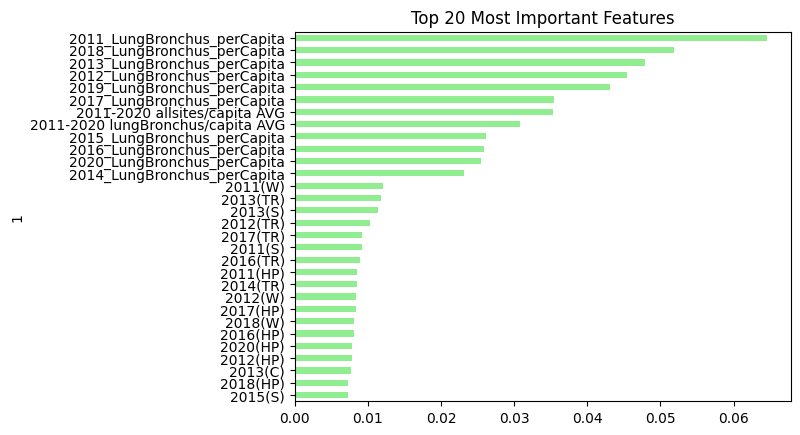

In [36]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_top20 = importances_sorted.tail(30)
importances_top20.plot(kind='barh', color='lightgreen', title='Top 20 Most Important Features', legend=False)

In [37]:
dropped_pop_and_cancercount = dropped_pop.drop(columns=['2011_LungBronchus','2012_LungBronchus','2013_LungBronchus','2014_LungBronchus','2015_LungBronchus','2016_LungBronchus','2017_LungBronchus','2018_LungBronchus','2019_LungBronchus','2020_LungBronchus','2021 Lung & Bronchus'])

In [38]:
# Define features set
X = dropped_pop_and_cancercount.copy()
X.drop("Lung/Bronchus_Classifer", axis=1, inplace=True)
X.head()

,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2013_LungBronchus_perCapita,2014_LungBronchus_perCapita,2015_LungBronchus_perCapita,2016_LungBronchus_perCapita,2017_LungBronchus_perCapita,2018_LungBronchus_perCapita,2019_LungBronchus_perCapita,2020_LungBronchus_perCapita,2011-2020 allsites/capita AVG,2011-2020 lungBronchus/capita AVG
0,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,0.000638,0.000584,0.000569,0.000593,0.000608,0.000626,0.000547,0.000546,0.004628,0.000591
1,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,0.000942,0.000859,0.000855,0.000868,0.000796,0.000857,0.000846,0.000841,0.005554,0.000867
2,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,0.000912,0.000896,0.000880,0.000873,0.000873,0.000904,0.000891,0.000916,0.005473,0.000898
3,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,0.000641,0.000636,0.000548,0.000573,0.000559,0.000623,0.000589,0.000584,0.004939,0.000595
4,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,0.000489,0.000487,0.000474,0.000463,0.000464,0.000475,0.000481,0.000457,0.004456,0.000473


In [39]:
# Define target vector
y = dropped_pop_and_cancercount["Lung/Bronchus_Classifer"]
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Lung/Bronchus_Classifer, dtype: int32

In [40]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [42]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [43]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=750)

In [45]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [46]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [47]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [48]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1,3
Actual 1,0,9


Accuracy Score : 0.7692307692307693
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.75      1.00      0.86         9

    accuracy                           0.77        13
   macro avg       0.88      0.62      0.63        13
weighted avg       0.83      0.77      0.72        13



In [49]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.0587426447407168, '2011_LungBronchus_perCapita'),
 (0.0467568827953103, '2013_LungBronchus_perCapita'),
 (0.042439737497087335, '2020_LungBronchus_perCapita'),
 (0.03829651750864663, '2019_LungBronchus_perCapita'),
 (0.03671030678362282, '2011-2020 lungBronchus/capita AVG'),
 (0.036356054714618294, '2011-2020 allsites/capita AVG'),
 (0.03588859253277667, '2012_LungBronchus_perCapita'),
 (0.02823338954058073, '2018_LungBronchus_perCapita'),
 (0.02556221527044327, '2015_LungBronchus_perCapita'),
 (0.021354651310920285, '2017_LungBronchus_perCapita'),
 (0.021354144696362383, '2016_LungBronchus_perCapita'),
 (0.01968630920486223, '2014_LungBronchus_perCapita'),
 (0.01486085741793537, '2011(S)'),
 (0.013069499242562635, '2011(W)'),
 (0.012816221838808081, '2013(W)'),
 (0.011786107071572776, '2012(W)'),
 (0.010135507100225937, '2018(W)'),
 (0.00969229578205311, '2013(S)'),
 (0.009225022954985436, '2018(S)'),
 (0.009222226344974051, '2014(W)'),
 (0.009207378703992521, '2015(S)'),
 (0.0087

<Axes: title={'center': 'Top 20 Most Important Features'}, ylabel='1'>

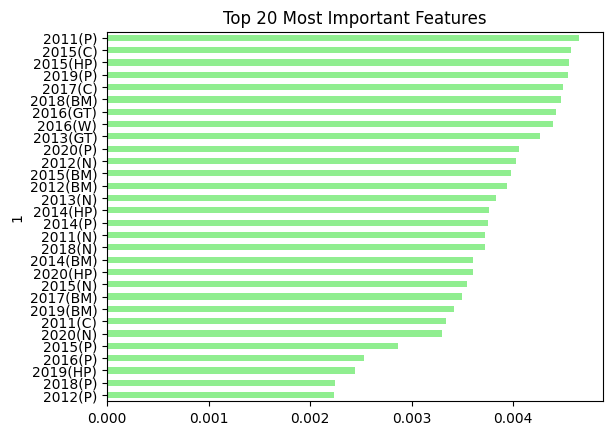

In [50]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_top20 = importances_sorted.head(30)
importances_top20.plot(kind='barh', color='lightgreen', title='Top 20 Most Important Features', legend=False)